# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import time
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load Iris Dataset

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target


# K-means

C:\Users\ishti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


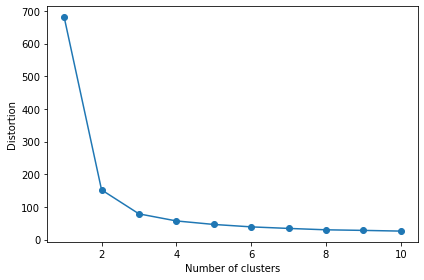

In [3]:
# Elbow approach to find K
distortions = []

for i in range (1,11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter =300,random_state=0)
    
    km.fit(X)
    distortions.append(km.inertia_)
    
#Plot distortions for different K
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()



SSE: 78.85
Silhouette Score: 0.55
Running time to fit the model: 47.976 ms



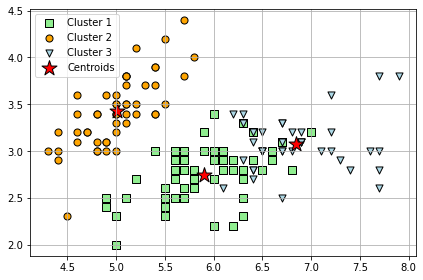

In [4]:
# Apply K-means for clustering K=3
km = KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter =300,random_state=0)
start = time.time()
y_km = km.fit_predict(X)
finish = time.time()
print('SSE: %.2f' % km.inertia_)
print('Silhouette Score: %.2f' % silhouette_score(X, km.labels_))
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))

# Plotting the clusters

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='Cluster 3')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()




# Analysis on class labels as ground truth

In [5]:
# Select the data points of cluster 1
cluster1 = y_km == 0
cluster1_data = X[cluster1]

# Select the data points of cluster 2
cluster2 = y_km == 1
cluster2_data = X[cluster2]

# Select the data points of cluster 3
cluster3 = y_km == 2
cluster3_data = X[cluster3]

# Select the labels of data points in cluster 1
cluster1_labels = iris.target[cluster1]
cluster2_labels = iris.target[cluster2]
cluster3_labels = iris.target[cluster3]

# Print the number of data points in cluster 1 and their labels
print('Number of data points in cluster 1:', len(cluster1_data))
print('Labels of data points in cluster 1:\n', cluster1_labels)
print('\n')

print('Number of data points in cluster 2:', len(cluster2_data))
print('Labels of data points in cluster 2:\n', cluster2_labels)
print('\n')
print('Number of data points in cluster 3:', len(cluster3_data))
print('Labels of data points in cluster 3:', cluster3_labels)

Number of data points in cluster 1: 62
Labels of data points in cluster 1:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Number of data points in cluster 2: 50
Labels of data points in cluster 2:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


Number of data points in cluster 3: 38
Labels of data points in cluster 3: [1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2]


In [6]:
# Measuring accuracy agains ground truth

# Cluster 1
correct_label1 = sum(cluster1_labels==1) # Label 1 is most frequent in CLuster 1
total_label1 = len(cluster1_labels)
accuracy_cluster1 = correct_label1/total_label1
print("Accuracy of Cluster 1 against ground truth: %.2f" %accuracy_cluster1)

# Cluster 2
correct_label2 = sum(cluster2_labels==0) # Label 0 is most frequent in CLuster 1
total_label2 = len(cluster2_labels)
accuracy_cluster2 = correct_label2/total_label2
print("Accuracy of Cluster 2 against ground truth: %.2f" %accuracy_cluster2)

# Cluster 3
correct_label3 = sum(cluster3_labels==2) # Label 2 is most frequent in CLuster 3
total_label3 = len(cluster3_labels)
accuracy_cluster3 = correct_label3/total_label3
print("Accuracy of Cluster 3 against ground truth: %.2f" %accuracy_cluster3)

# Overall Accuracy
accuracy = (correct_label1+correct_label2+correct_label3)/(total_label1+total_label2+total_label3)
print("Overall Accuracy against ground truth: %.2f" %accuracy)

Accuracy of Cluster 1 against ground truth: 0.77
Accuracy of Cluster 2 against ground truth: 1.00
Accuracy of Cluster 3 against ground truth: 0.95
Overall Accuracy against ground truth: 0.89


SSE: 152.35
Silhouette Score: 0.68
Running time to fit the model: 30.087 ms



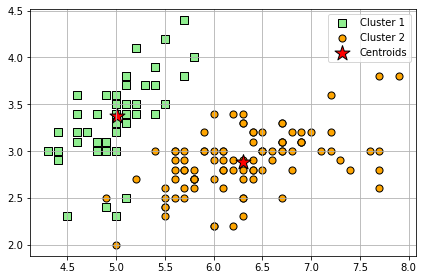

In [7]:
# Apply K-means for clustering K=2
km = KMeans(n_clusters=2,init='k-means++',n_init=10,max_iter =300,random_state=0)
start = time.time()
y_km = km.fit_predict(X)
finish = time.time()
print('SSE: %.2f' % km.inertia_)
print('Silhouette Score: %.2f' % silhouette_score(X, km.labels_))
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))

# Plotting the clusters

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='Cluster 2')

plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='Centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()




# Hierarchical approach offered by the SciPy library

Running time to fit the model: 2.000 ms

             row label 1  row label 2  distance  no. of items in clust.
cluster 1          101.0        142.0  0.000000                     2.0
cluster 2            7.0         39.0  0.100000                     2.0
cluster 3            0.0         17.0  0.100000                     2.0
cluster 4            9.0         34.0  0.100000                     2.0
cluster 5          128.0        132.0  0.100000                     2.0
...                  ...          ...       ...                     ...
cluster 145        284.0        292.0  2.236068                    60.0
cluster 146        287.0        288.0  2.428992                    50.0
cluster 147        290.0        294.0  3.210919                    72.0
cluster 148        293.0        295.0  4.024922                    78.0
cluster 149        296.0        297.0  7.085196                   150.0

[149 rows x 4 columns]


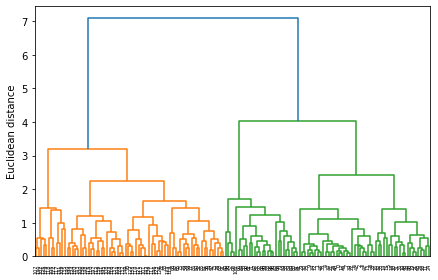

Silhouette Score with k=3: 0.51


In [8]:
start = time.time()
row_clusters = linkage(pdist(X, metric='euclidean'), method='complete')
finish = time.time()
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))

# Create a DataFrame to display the results
row_clusters_df = pd.DataFrame(
    row_clusters,
    columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
    index=['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])])
print(row_clusters_df)

# Plotting the Dendogram
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()


# Set the number of clusters
n_clusters = 3
# Cut the dendrogram to obtain cluster labels
cluster_labels = fcluster(row_clusters, n_clusters, criterion='maxclust')

print('Silhouette Score with k=3: %.2f' % silhouette_score(X, cluster_labels))

# Hierarchical approach offered by the scikit-learn library

In [9]:
# linkage= complete
ag_cluster1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
start = time.time()
labels = ag_cluster1.fit_predict(X)
finish = time.time()
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))
print('Cluster labels: %s' % labels)

print('Silhouette Score with k=3: %.2f' % silhouette_score(X, ag_cluster1.labels_))

Running time to fit the model: 1.999 ms

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
Silhouette Score with k=3: 0.51


In [10]:
# linkage= average
ag_cluster2 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
start = time.time()
labels = ag_cluster2.fit_predict(X)
finish = time.time()
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))
print('Cluster labels: %s' % labels)

print('Silhouette Score with k=3: %.2f' % silhouette_score(X, ag_cluster2.labels_))

Running time to fit the model: 2.997 ms

Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Silhouette Score with k=3: 0.55


# Load MNIST Dataset

In [11]:
# Load the MNIST dataset
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

# Split the dataset to create a subset (3% of the data (train data) which is 2100 instance)
X_subset, _, y_subset, _ = train_test_split(X, y, test_size=0.97, random_state=1, stratify=y)

# K-means

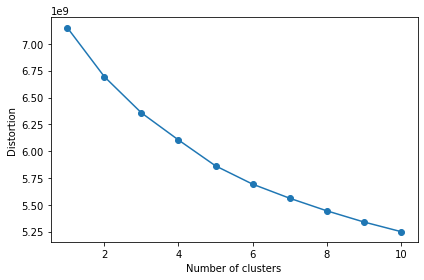

In [12]:
# Elbow approach to find K
distortions = []

for i in range (1,11):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter =300,random_state=0)
    
    km.fit(X_subset)
    distortions.append(km.inertia_)
    
#Plot distortions for different K
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

SSE: 5250368043.24
Silhouette Score: 0.06
Running time to fit the model: 3132.188 ms



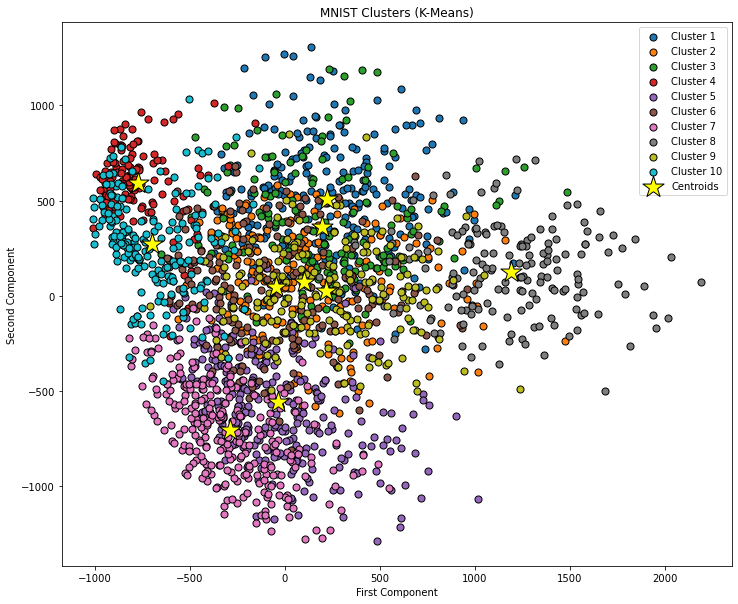

In [13]:
# Apply K-means for clustering
km = KMeans(n_clusters=10,init='k-means++',n_init=10,max_iter =300,random_state=0)
start = time.time()
y_km = km.fit_predict(X_subset)
finish = time.time()
print('SSE: %.2f' % km.inertia_)
print('Silhouette Score: %.2f' % silhouette_score(X_subset, km.labels_))
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))

# Plotting the clusters

#Dimension reduction using PCA for better visualization of the clusters (2-D)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_subset)
centroids_reduced = pca.transform(km.cluster_centers_)

plt.figure(figsize=(12, 10))

# Define a list of colors for clusters

colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
          'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']


for i in range(km.n_clusters):
    plt.scatter(X_reduced[km.labels_ == i, 0], X_reduced[km.labels_ == i, 1],
                s=50, c=colors[i], marker='o', edgecolor='black', label=f'Cluster {i+1}')

# Plot the centroids
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1],
            s=500, c='yellow', marker='*', edgecolor='black', label='Centroids')

plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('MNIST Clusters (K-Means)')

plt.legend()
plt.show()


# Analysis on class labels as ground truth

In [14]:
# Using adjusted random score

from sklearn.metrics import adjusted_rand_score

ars = adjusted_rand_score(y_subset, y_km)
print('Adjusted Rand Index: %.2f' % ars)

Adjusted Rand Index: 0.40


# Hierarchical approach offered by the SciPy library

Running time to fit the model: 1691.560 ms

              row label 1  row label 2     distance  no. of items in clust.
cluster 1          1193.0       1604.0   332.666500                     2.0
cluster 2            13.0       1382.0   362.786439                     2.0
cluster 3           616.0       1486.0   390.953961                     2.0
cluster 4          1172.0       2025.0   394.177625                     2.0
cluster 5           298.0        521.0   400.224937                     2.0
...                   ...          ...          ...                     ...
cluster 2095       4184.0       4190.0  3605.929838                  1315.0
cluster 2096       4187.0       4192.0  3750.636479                   292.0
cluster 2097       4193.0       4195.0  3785.527572                   645.0
cluster 2098       4191.0       4196.0  3880.441212                   785.0
cluster 2099       4194.0       4197.0  3900.572394                  2100.0

[2099 rows x 4 columns]


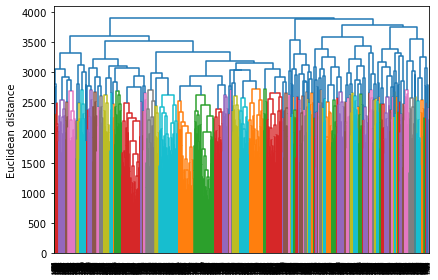

Silhouette Score with k=10: 0.03


In [24]:
start = time.time()
row_clusters = linkage(pdist(X_subset, metric='euclidean'), method='complete')
finish = time.time()
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))

# Create a DataFrame to display the results
row_clusters_df = pd.DataFrame(
    row_clusters,
    columns=['row label 1', 'row label 2', 'distance', 'no. of items in clust.'],
    index=['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])])
print(row_clusters_df)

# Plotting the Dendogram
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()


# Set the number of clusters
n_clusters = 10
# Cut the dendrogram to obtain cluster labels
cluster_labels = fcluster(row_clusters, n_clusters, criterion='maxclust')

print('Silhouette Score with k=10: %.2f' % silhouette_score(X_subset, cluster_labels))

# Hierarchical approach offered by the scikit-learn library

In [39]:
# linkage= complete
ag_cluster1 = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='complete')
start = time.time()
labels = ag_cluster1.fit_predict(X_subset)
finish = time.time()
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))
print('Cluster labels: %s' % labels)
print('Silhouette Score with k=10: %.2f' % silhouette_score(X_subset, ag_cluster1.labels_))

Running time to fit the model: 1678.619 ms

Cluster labels: [4 4 4 ... 2 4 4]
Silhouette Score with k=10: 0.03


In [83]:
# linkage= average
ag_cluster2 = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='average')
start = time.time()
labels = ag_cluster2.fit_predict(X_subset)
finish = time.time()
print('Running time to fit the model: {:.3f} ms\n'.format((finish-start)*10**3))
print('Cluster labels: %s' % labels)
print('Silhouette Score with k=10: %.2f' % silhouette_score(X_subset, ag_cluster2.labels_))

Running time to fit the model: 1873.473 ms

Cluster labels: [9 9 9 ... 0 9 9]
Silhouette Score with k=10: 0.06
